In [99]:
%store -r g_two
%store -r g_one

In [100]:
g_two_0 = g_one.loc[:,['Category', 'Released']]
g_two_1 = g_one.loc[:,['Category', 'Size']]
g_two_2 = g_one.loc[:,['Size', 'Released']]

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

Istogrammi

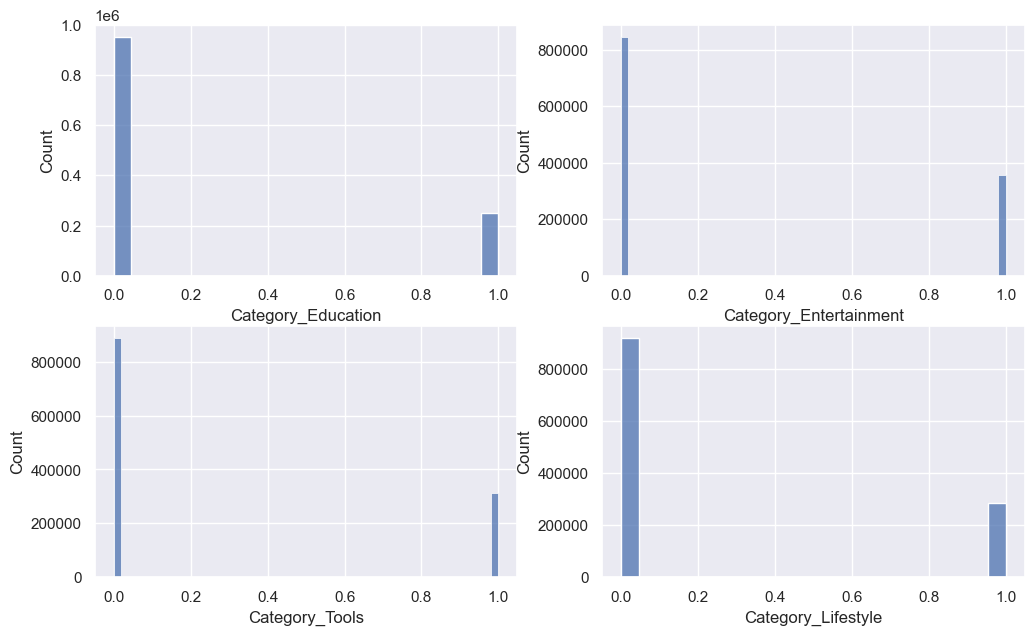

In [102]:
plt.figure(figsize=(12,15))
sns.set(style='darkgrid')
plt.subplot(4, 2, 1)
sns.histplot(g_two['Category_Education'])
plt.subplot(4, 2, 2)
sns.histplot(g_two['Category_Entertainment'])
plt.subplot(4, 2, 3)
sns.histplot(g_two['Category_Tools'])
plt.subplot(4, 2, 4)
sns.histplot(g_two['Category_Lifestyle'])

plt.show()

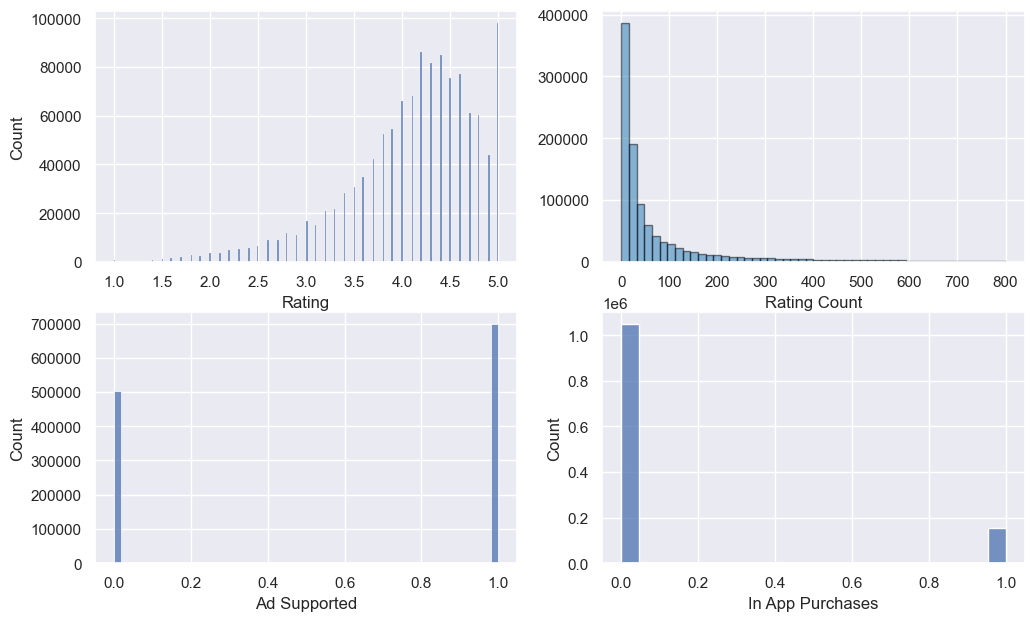

In [103]:
plt.figure(figsize=(12,15))

plt.subplot(4, 2, 1)
sns.histplot(g_two['Rating'])
plt.subplot(4, 2, 2)
plt.hist(g_two['Rating Count'], bins=50, color='#1F77B4', alpha=0.5, edgecolor='black', range=(0,800))
plt.xlabel('Rating Count')
plt.subplot(4, 2, 3)
sns.histplot(g_two['Ad Supported'])
plt.subplot(4, 2, 4)
sns.histplot(g_two['In App Purchases'])

plt.show()

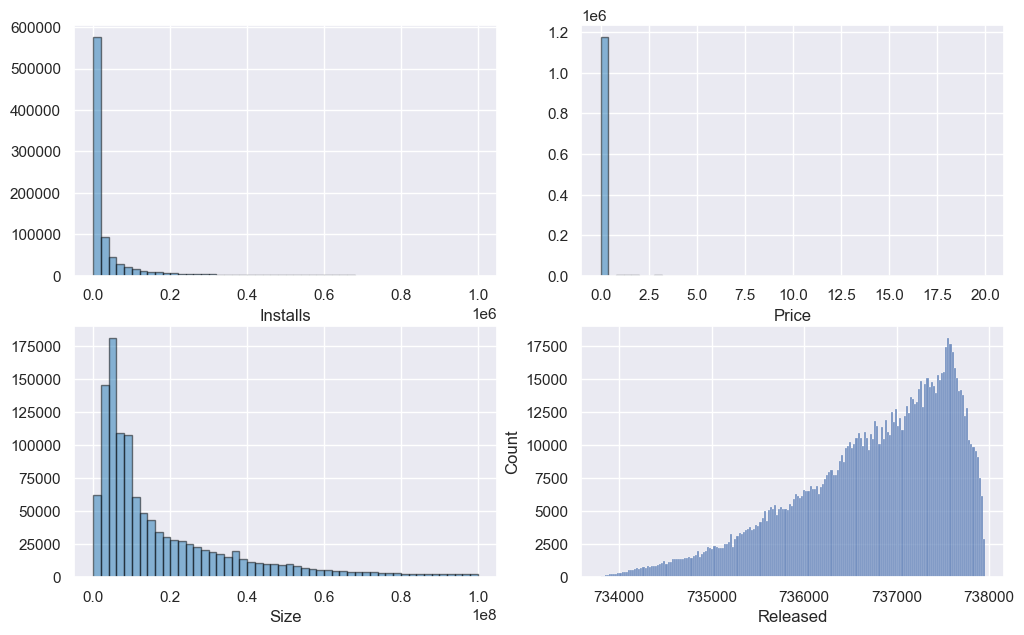

In [104]:
plt.figure(figsize=(12,15))

plt.subplot(4, 2, 1)
plt.hist(g_two['Installs'], bins=50, color='#1F77B4', alpha=0.5, edgecolor='black', range=(1000,1000000))
plt.xlabel('Installs')
plt.subplot(4, 2, 2)
plt.hist(g_two['Price'],  bins=50, color='#1F77B4', alpha=0.5, edgecolor='black', range=(0, 20))
plt.xlabel('Price')
plt.subplot(4, 2, 3)
plt.hist(g_two['Size'],  bins=50, color='#1F77B4', alpha=0.5, edgecolor='black', range=(1e5,1e8))
plt.xlabel('Size')
plt.subplot(4, 2, 4)

data_ordinaria = g_two['Released']
sns.histplot(data_ordinaria)

plt.show()

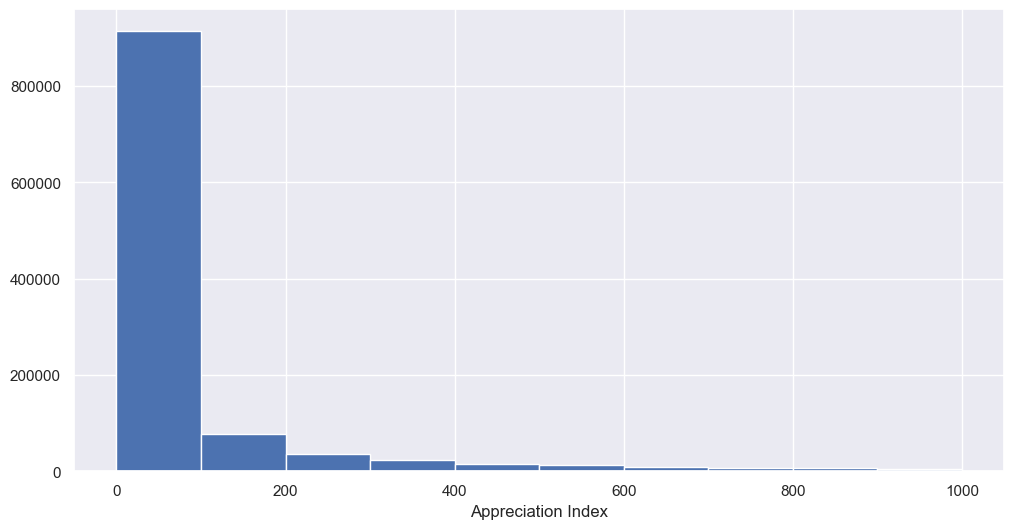

In [105]:
plt.figure(figsize=(12,6))
#plt.hist(g_two['Appreciation Index'], bins=50, color='#1F77B4', alpha=0.5, edgecolor='black', range=(1000,10000))
plt.hist(g_two['Appreciation Index'], range=(0, 1000))
plt.xlabel('Appreciation Index')
plt.show()

Visualizzazione per categoria

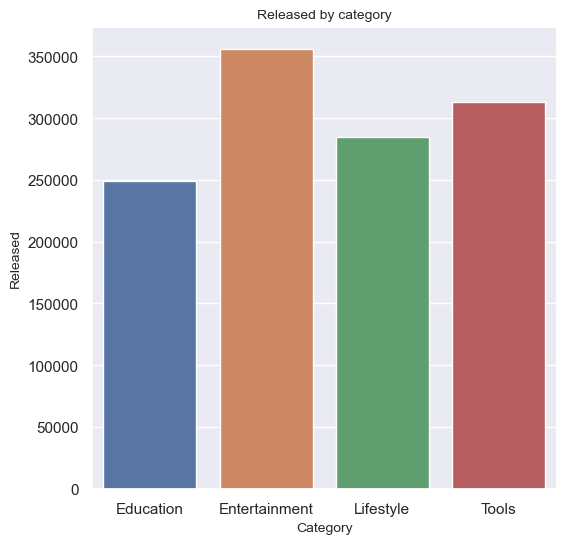

In [106]:
released_for_category = g_two_0.groupby('Category').count()
plt.figure(figsize=(6,6))
sns.barplot(data=released_for_category, 
            x=released_for_category.Released.index, 
            y=released_for_category.Released.values)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Released', fontsize=10)
plt.title('Released by category', fontsize=10)
plt.show()

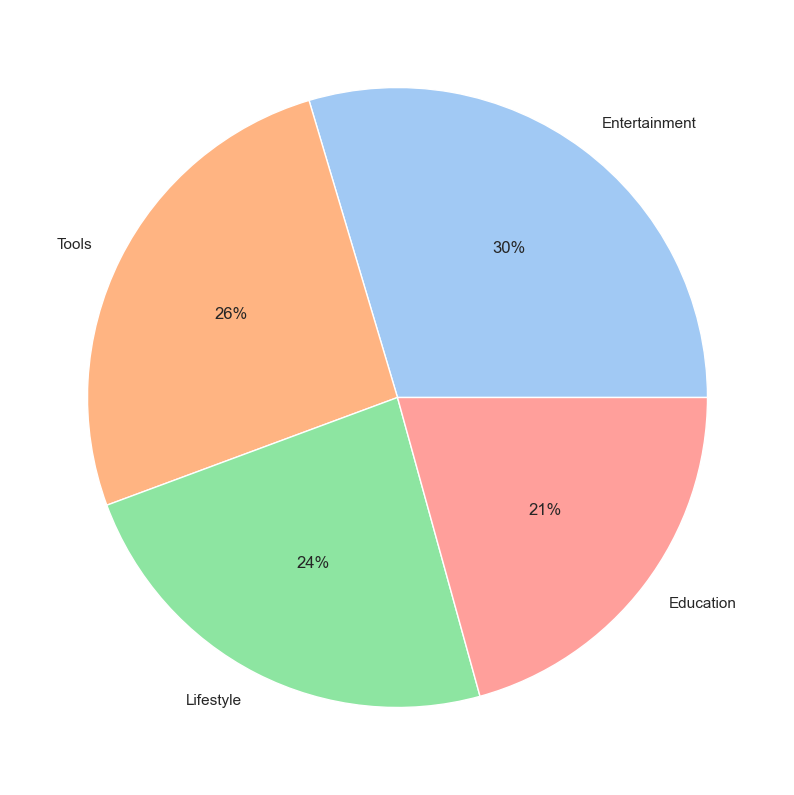

In [107]:
plt.figure(figsize=(10,19))
colors = sns.color_palette('pastel')[0:5]
categories = g_one['Category'].value_counts()
plt.pie(categories.values, labels = categories.index , colors = colors, autopct='%.0f%%')
plt.show()

Migliori 10 applicazioni per rating, rating count e appreciation index

In [108]:
tops_10_appreciation_index = g_one.nlargest(10, 'Appreciation Index')
print(tops_10_appreciation_index)
tops_10_rating = g_one.nlargest(10, 'Rating')
print(tops_10_rating)
tops_10_rating_and_rating_count = g_one[g_one['Rating']==5].nlargest(10, 'Rating Count')
print(tops_10_rating_and_rating_count)
tops_10_rating_count = g_one.nlargest(10, 'Rating Count')
print(tops_10_rating_count)

                                         App Name       Category  Rating  \
385470                         WhatsApp Messenger          Tools     4.0   
881403                                    YouTube          Tools     4.4   
304824                                  Instagram      Lifestyle     3.8   
244319                 Garena Free Fire - Rampage  Entertainment     4.2   
2095852  Messenger – Text and Video Chat for Free          Tools     4.0   
423997                             Clash of Clans  Entertainment     4.5   
65037                                      TikTok      Lifestyle     4.4   
1830962                             Google Photos          Tools     4.5   
58082                      PUBG MOBILE - Traverse  Entertainment     4.3   
286345                           Candy Crush Saga  Entertainment     4.6   

         Rating Count  Ad Supported  In App Purchases    Installs  \
385470      138557570             0                 0  6265637751   
881403      112440547    

Size media per categoria

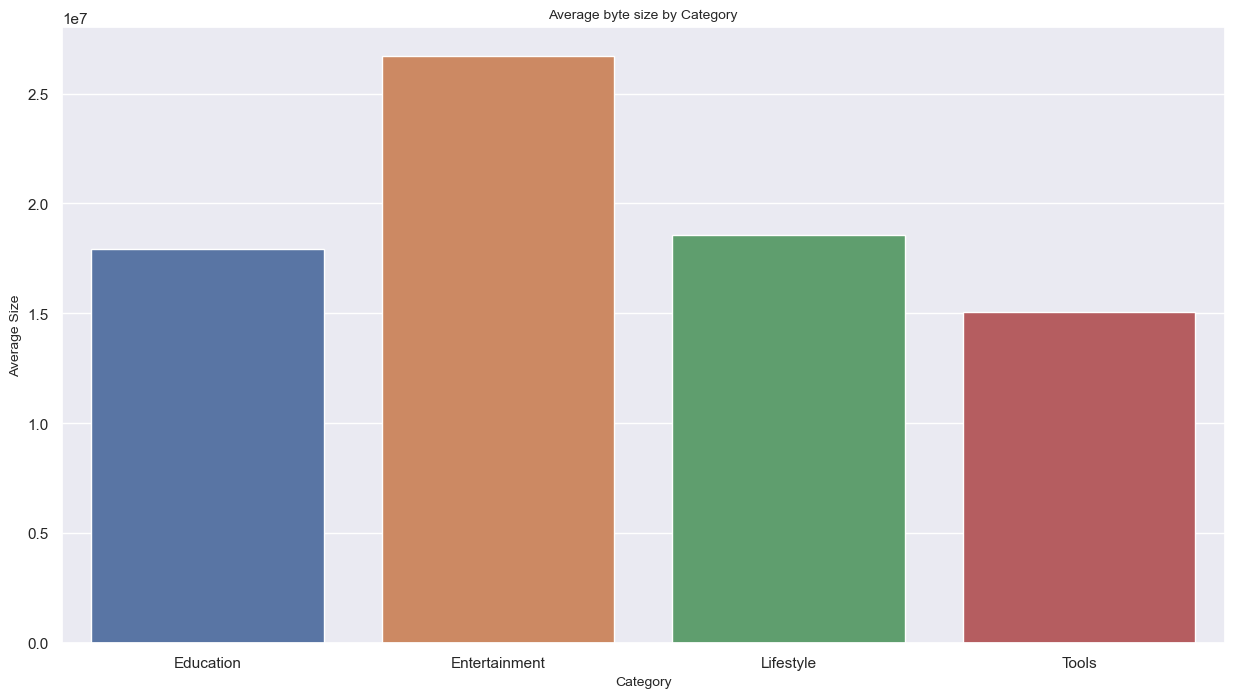

In [109]:
avg_size_by_category = g_two_1.groupby('Category').mean()

sns.barplot(data=avg_size_by_category, 
            x=avg_size_by_category.Size.index, 
            y=avg_size_by_category.Size.values)
plt.xlabel('Category', fontsize=10)
plt.ylabel('Average Size', fontsize=10)
plt.title('Average byte size by Category', fontsize=10)
plt.show()

Andamento della dimensione media e rating rispetto al tempo 

In [110]:
def confidence_interval(mean, sdev):  
    return pd.Series(map(lambda m,s: m+s/2, mean, sdev)), pd.Series(map(lambda m,s: m-s/2, mean, sdev))
    

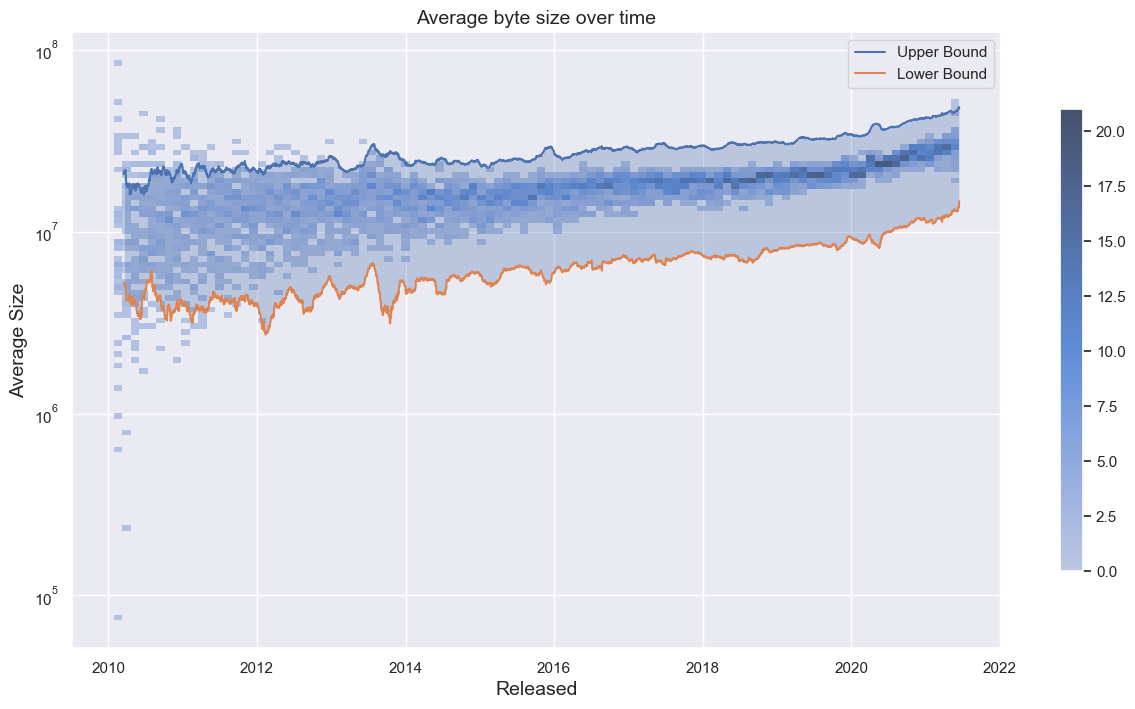

In [111]:
avg_size_by_released = g_two_2.groupby('Released').mean()
sdev_by_released = g_two_2.groupby('Released').std(ddof=0)

sdev = pd.Series(sdev_by_released.Size.values).rolling(window=50).mean()
mean = pd.Series(avg_size_by_released.Size.values).rolling(window=50).mean()
upper, lower = confidence_interval(mean, sdev)

xlabel = pd.Series(avg_size_by_released.Size.index).map(dt.datetime.fromordinal)
sns.set(rc={'figure.figsize':(15,8)})
fig,ax = plt.subplots()
sns.histplot(data=avg_size_by_released,
            x=xlabel,
            y=avg_size_by_released.Size.values,
            bins=100,
            log_scale=(False, True),
            cbar=True, cbar_kws=dict(shrink=.75))
plt.fill_between(xlabel, lower, upper, alpha=.3)
ax.plot(xlabel, upper, linestyle='-', label='Upper Bound')
ax.plot(xlabel, lower, linestyle='-', label='Lower Bound')
plt.legend(loc='upper right')
plt.xlabel('Released', fontsize=14)
plt.ylabel('Average Size', fontsize=14)
plt.title('Average byte size over time', fontsize=14)
plt.show()

seleziono una parte dei dati per poi applicare un modello autoregressivo

In [112]:
time_series = pd.DataFrame({'time': avg_size_by_released.Size.index, 'avg_bytes': avg_size_by_released.Size.values})

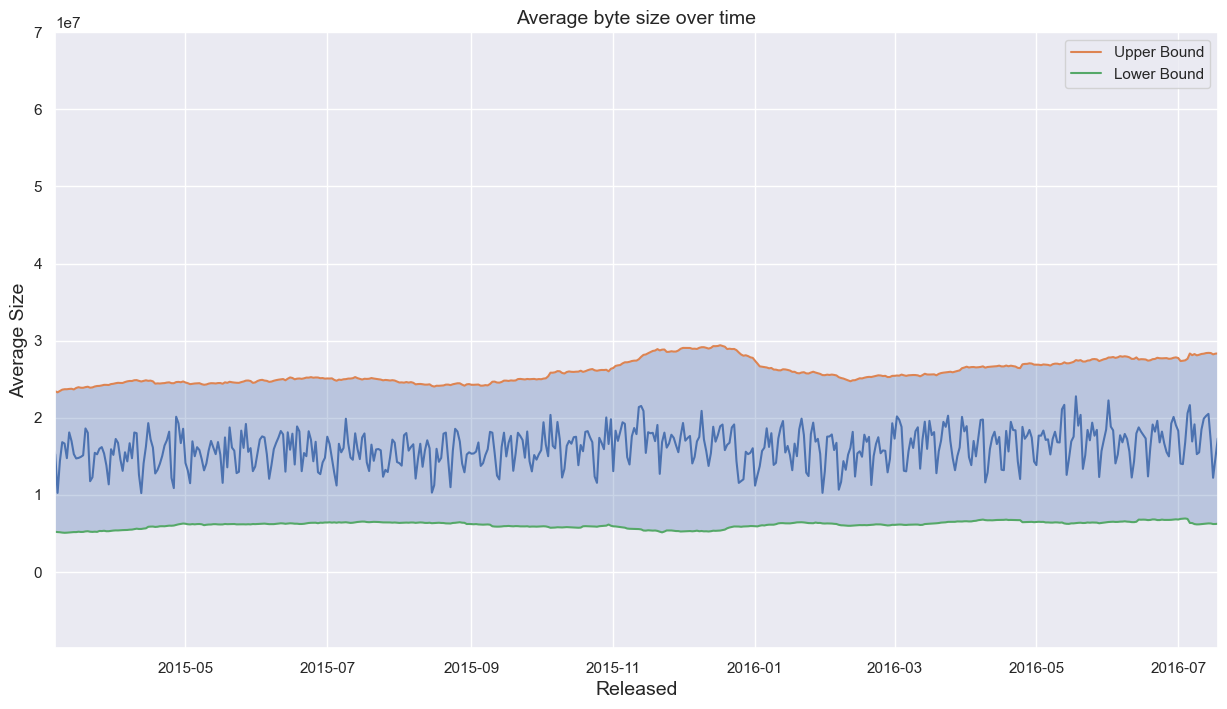

In [113]:
sns.set(rc={'figure.figsize':(15,8)})
fig,ax = plt.subplots()

sdev = pd.Series(sdev_by_released.Size.values).rolling(window=50).mean()
mean = pd.Series(time_series.avg_bytes).rolling(window=50).mean()
upper, lower = confidence_interval(mean, sdev)

sns.lineplot(x=xlabel, y=time_series.avg_bytes)

plt.fill_between(xlabel, lower, upper, alpha=.3)
ax.plot(xlabel, upper, linestyle='-', label='Upper Bound')
ax.plot(xlabel, lower, linestyle='-', label='Lower Bound')
plt.xlim(16500,17000)
plt.ylim(-0.99*pow(10,7),0.7*pow(10,8))
plt.legend(loc='upper right')
plt.xlabel('Released', fontsize=14)
plt.ylabel('Average Size', fontsize=14)
plt.title('Average byte size over time', fontsize=14)
plt.show()

visualizzo l'andamento del rating

In [114]:
g_two_3 = g_two.loc[:, ['Rating', 'Released']]

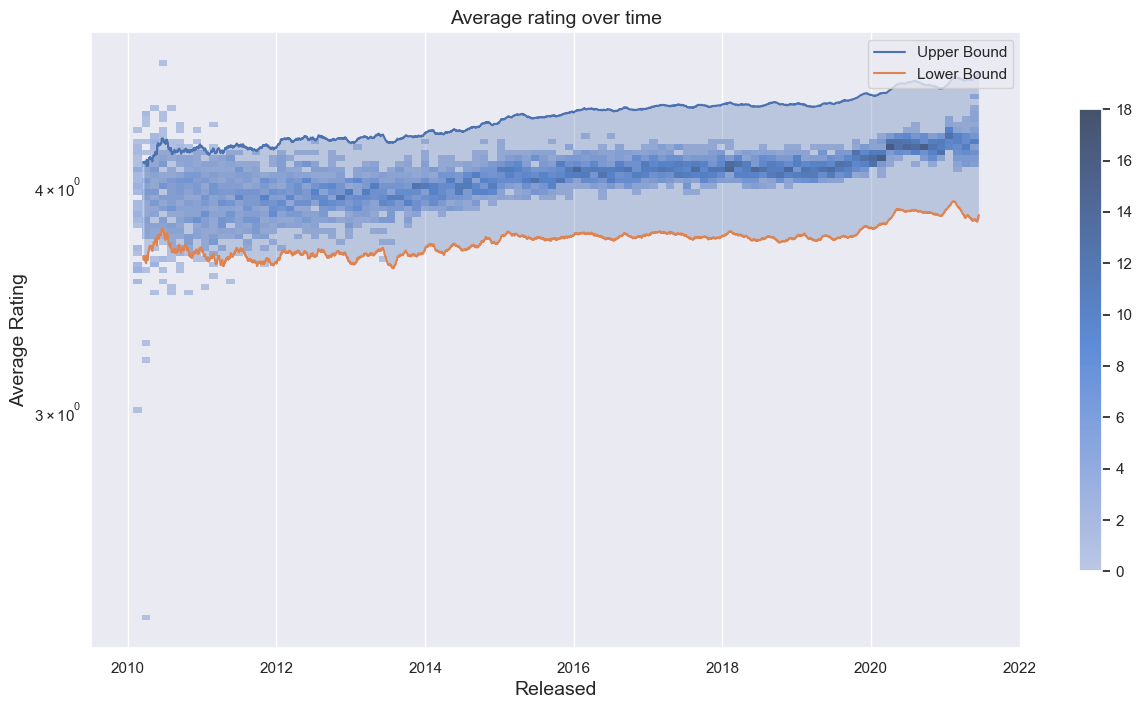

In [115]:
avg_rating_by_released = g_two_3.groupby('Released').mean()
sdev_by_released = g_two_3.groupby('Released').std(ddof=0)

sdev = pd.Series(sdev_by_released.Rating.values).rolling(window=50).mean()
mean = pd.Series(avg_rating_by_released.Rating.values).rolling(window=50).mean()
upper, lower = confidence_interval(mean, sdev)

xlabel = pd.Series(avg_rating_by_released.Rating.index).map(dt.datetime.fromordinal)
sns.set(rc={'figure.figsize':(15,8)})
fig,ax = plt.subplots()
sns.histplot(data=avg_rating_by_released,
            x=xlabel,
            y=avg_rating_by_released.Rating.values,
            bins=100,
            log_scale=(False, True),
            cbar=True, cbar_kws=dict(shrink=.75))
plt.fill_between(xlabel, lower, upper, alpha=.3)
ax.plot(xlabel, upper, linestyle='-', label='Upper Bound')
ax.plot(xlabel, lower, linestyle='-', label='Lower Bound')
plt.legend(loc='upper right')
plt.xlabel('Released', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average rating over time', fontsize=14)
plt.show()

Coefficiente di Correlazione e heatmap

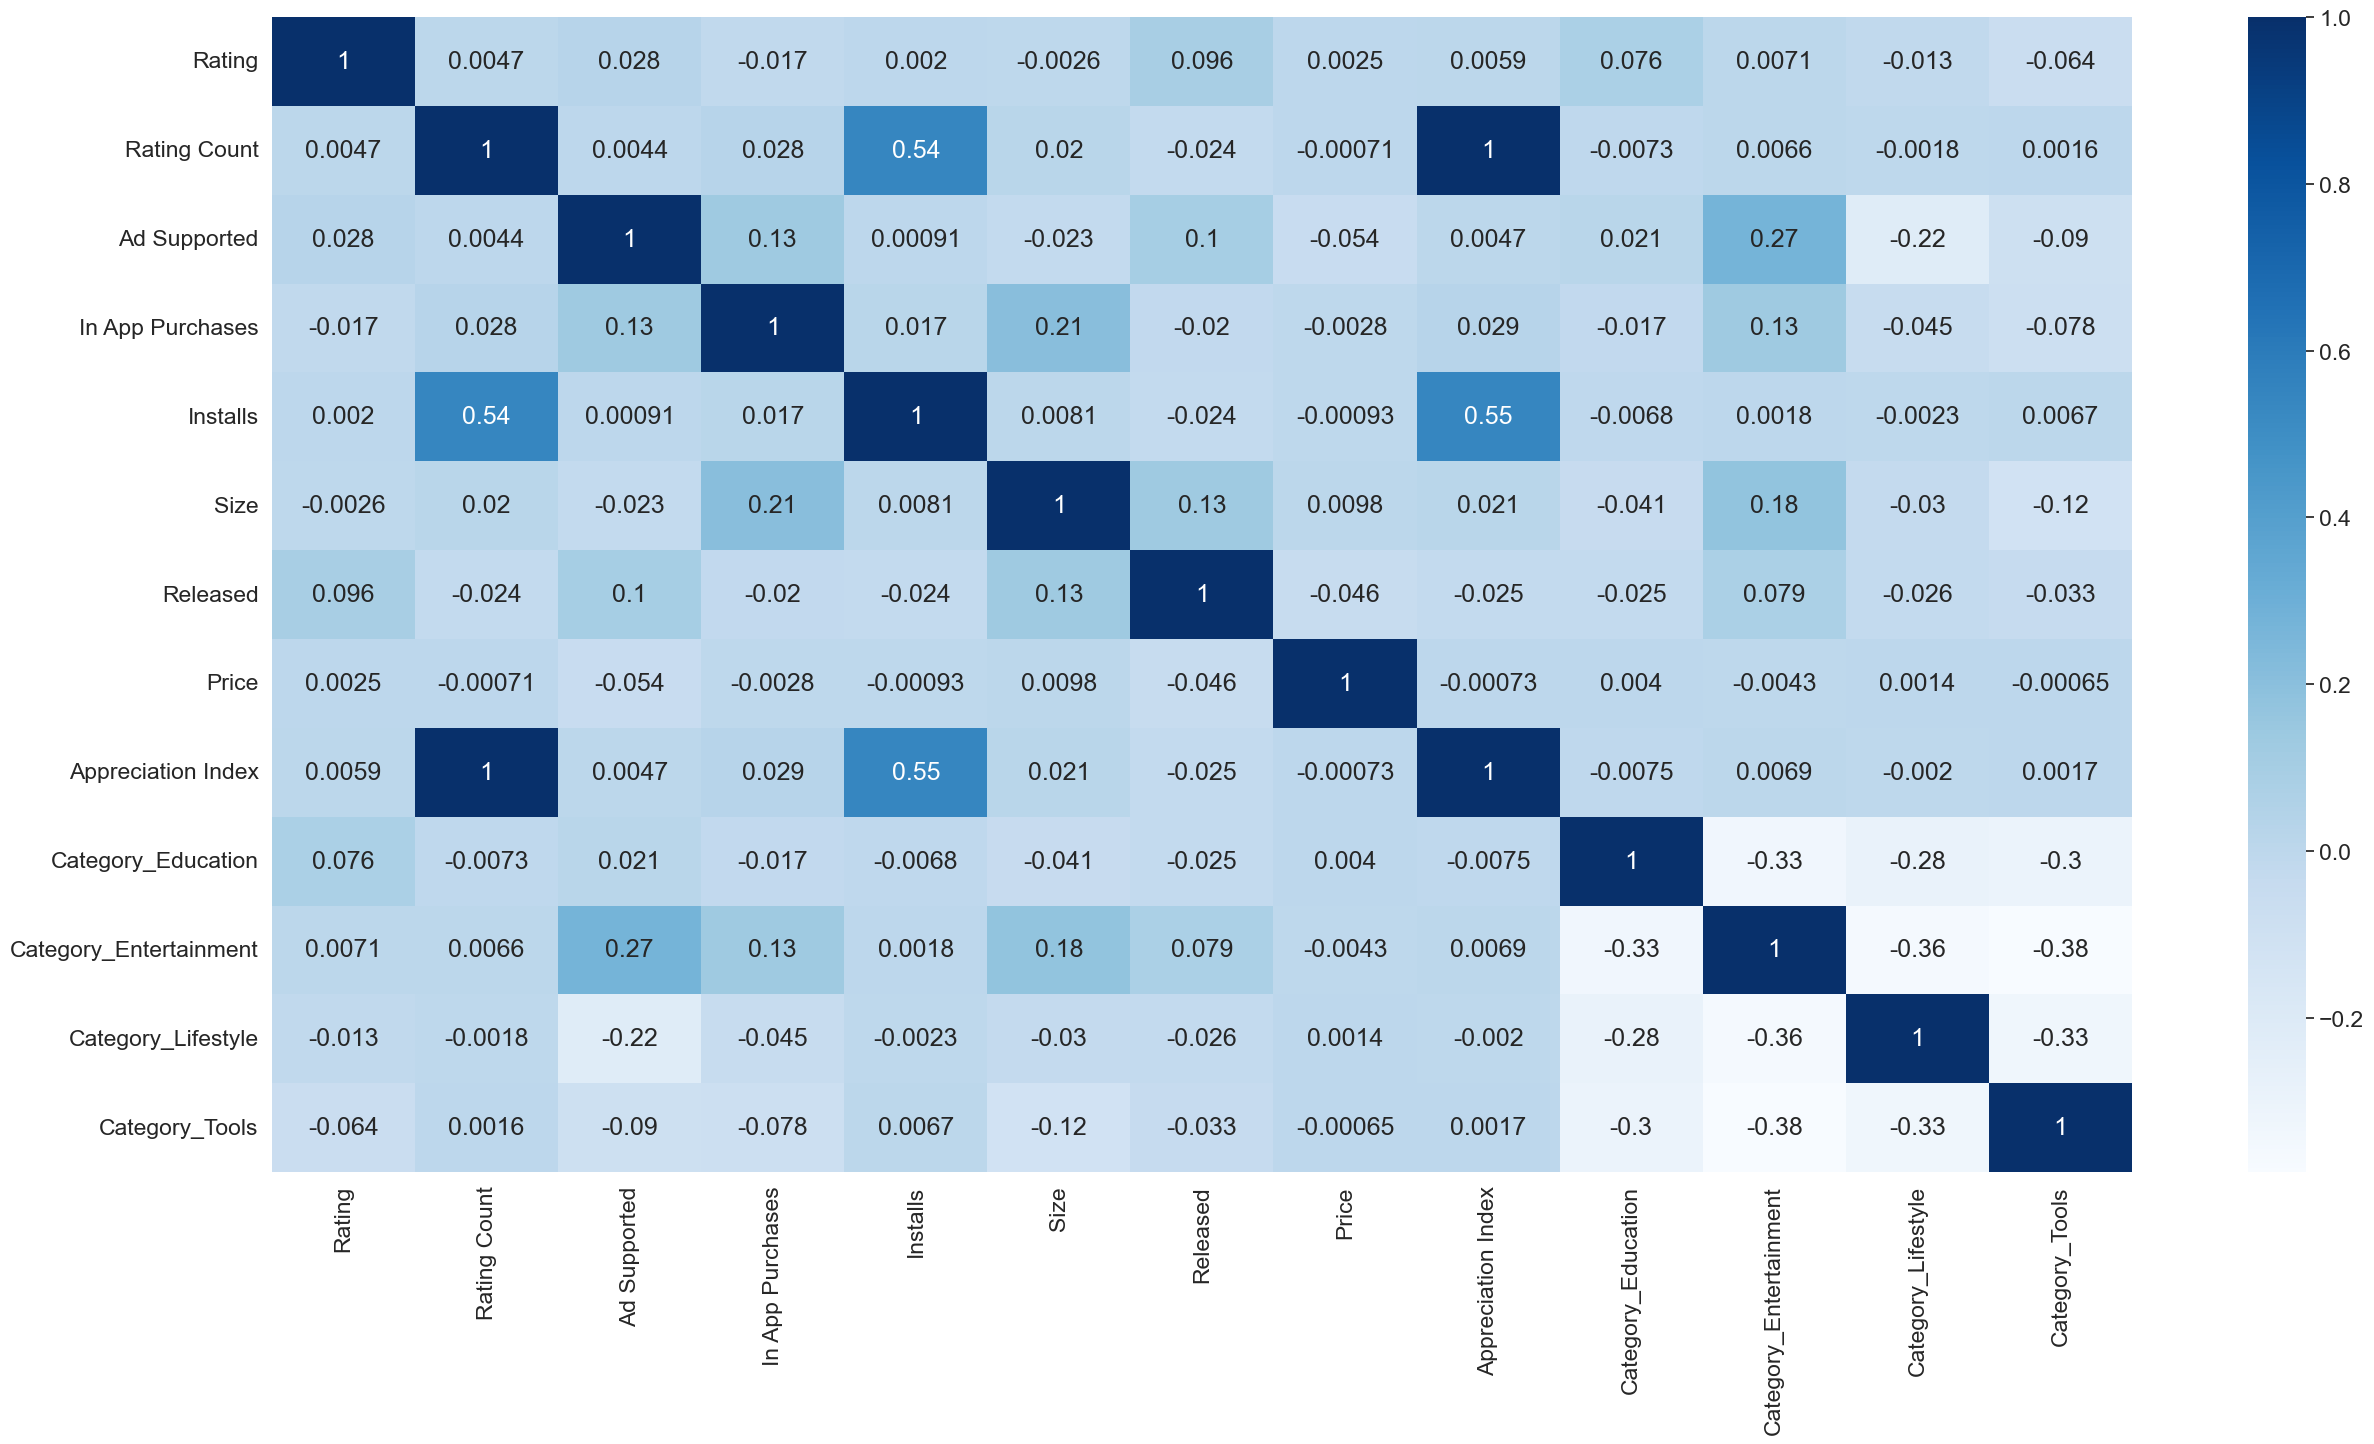

In [116]:
correlation = g_two.drop('App Name', axis=1).corr()
plt.figure(figsize=(30,15))
sns.set(font_scale=1.5)
sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={"size": 18})
plt.show()

In [121]:
%store time_series

Stored 'time_series' (DataFrame)
